In [21]:
!pip install numpy pandas matplotlib seaborn sklearn

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [23]:
import os

# %cd ..
# os.chdir('C:/Users/Vartika/Documents/GitHub/Delayma-Models/')

data = pd.read_csv('Datasets/df_1_3.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,CRS_ARR_M,...,Drizzle,Snow,Wintry Mix,Freezing Rain,MONTH_sin,MONTH_cos,DAY_OF_MONTH_sin,DAY_OF_MONTH_cos,DAY_OF_WEEK_sin,DAY_OF_WEEK_cos
0,11,1,5,3,28,0,371,2475,340,531,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
1,11,1,5,1,28,0,373,2475,360,553,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
2,11,1,5,3,56,0,388,2586,410,618,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
3,11,1,5,4,56,0,391,2586,420,631,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521
4,11,1,5,4,4,0,82,187,420,502,...,0,0,0,0,-0.5,0.866025,0.201299,0.97953,-0.974928,-0.222521


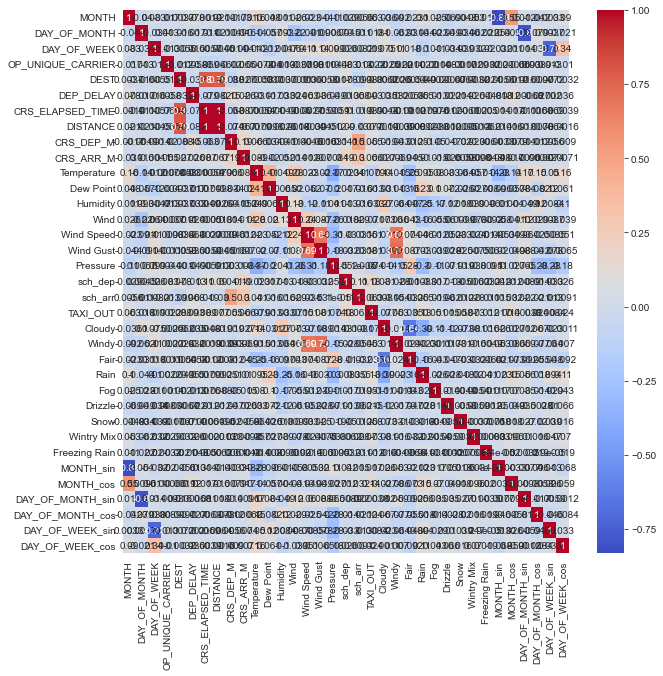

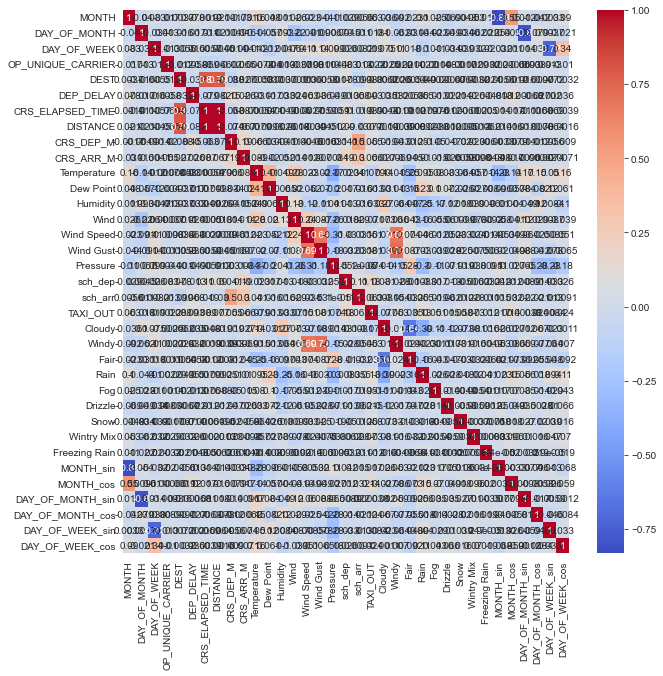

In [24]:
# plotting the covariance matrix for the features
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, data['DEP_DELAY'], test_size=0.2)

In [26]:
# implementing a perceptron
clf = Perceptron(penalty = 'l2', alpha = 0.001, max_iter = 10000, tol = 1e-5, verbose = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
recall = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[1, 0])
precision = confusion_matrix[1, 1] / (confusion_matrix[1, 1] + confusion_matrix[0, 1])
f1_score = 2 * (precision * recall) / (precision + recall)

-- Epoch 1
Norm: 2910.85, NNZs: 34, Bias: -47.000000, T: 4716, Avg. loss: 674711.289996
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2043.42, NNZs: 34, Bias: -82.000000, T: 9432, Avg. loss: 663742.454989
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3210.03, NNZs: 34, Bias: -130.000000, T: 14148, Avg. loss: 663157.475273
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2576.20, NNZs: 34, Bias: -175.000000, T: 18864, Avg. loss: 661622.638241
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2363.37, NNZs: 34, Bias: -228.000000, T: 23580, Avg. loss: 687237.185047
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1850.48, NNZs: 34, Bias: -272.000000, T: 28296, Avg. loss: 674996.402227
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 3068.33, NNZs: 34, Bias: -320.000000, T: 33012, Avg. loss: 669599.131850
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2478.44, NNZs: 34, Bias: -367.000000, T: 37728, Avg. loss: 680399.794237
Total training time: 0.00 seconds.
-- E

In [27]:
print(f"Accuracy: {accuracy*100}%")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1_score}")
print(f"Confusion Matrix: \n{confusion_matrix}")
print(f"Classification Report: \n{classification_report}")

Accuracy: 86.51399491094148%
Recall: 0.013793103448275862
Precision: 0.1111111111111111
F1 Score: 0.024539877300613494
Confusion Matrix: 
[[1018   16]
 [ 143    2]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1034
           1       0.11      0.01      0.02       145

    accuracy                           0.87      1179
   macro avg       0.49      0.50      0.48      1179
weighted avg       0.78      0.87      0.82      1179

Accuracy: 87.44698897370652%
Recall: 0.029411764705882353
Precision: 0.2
F1 Score: 0.05128205128205128
Confusion Matrix: 
[[1027   16]
 [ 132    4]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1043
           1       0.20      0.03      0.05       136

    accuracy                           0.87      1179
   macro avg       0.54      0.51      0.49      1179
weighted avg       0.81      0.87      